In [1]:
! pip install mglearn
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import mglearn

     |████████████████████████████████| 542kB 3.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=920a4d9d2ddc8de9f81fbfdf774f088299e2e84a9471087604d27e03c91275c1
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


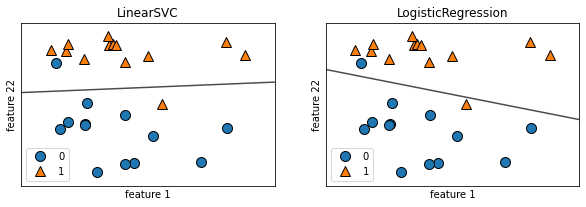

In [2]:
# 로지스틱 회귀, SVM library 임포트

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.6, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("feature 1")
    ax.set_ylabel("feature 22")
axes[0].legend()
axes[1].legend()

In [3]:
# Decision Tree Classifier 임포트

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
# 훈련/테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
    )

# 학습
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

# 결과
print("train set : {:.3f}".format(tree.score(X_train, y_train)))
print("test set : {:.3f}".format(tree.score(X_test, y_test)))

train set : 1.000
test set : 0.937


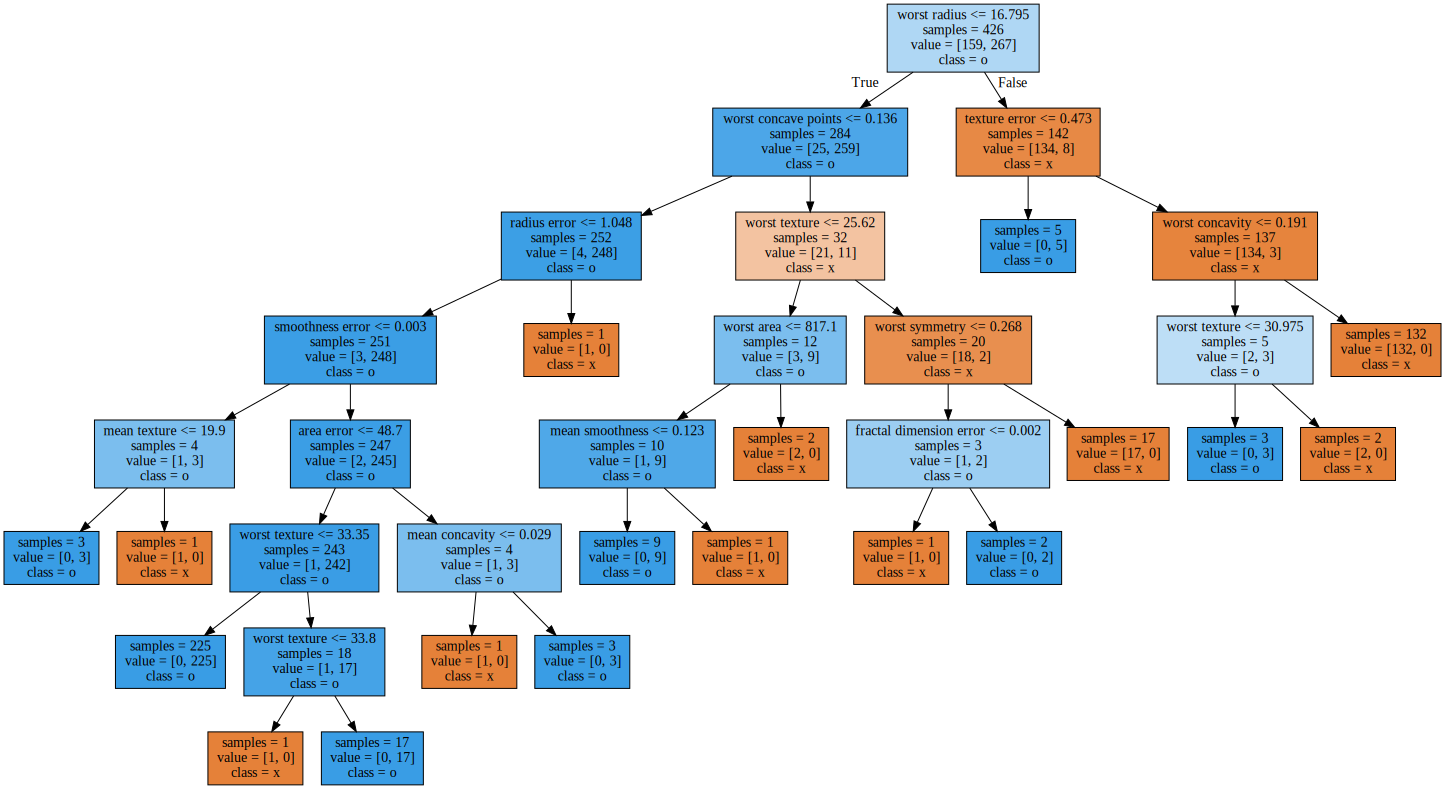

In [4]:
# 트리 모듈의 export_graphviz 함수를 이용해 트리 시각화 가능
# filled 매개변수를 true 지정하면 노드 클래스 구분되도록 색칠


from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["x", "o"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

# graphviz 모듈 사용해 시각화

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


In [5]:
# 특성 중요도 확인

print("feature importance:")
print(tree.feature_importances_)

feature importance:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


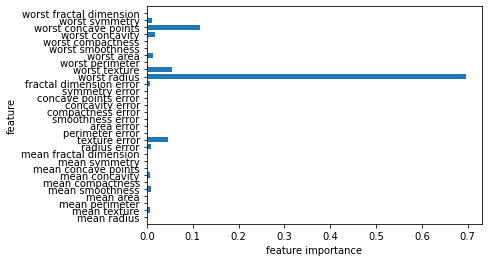

In [6]:
# 특성 중요도 시각화

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

Text(0, 0.5, 'price ($/Mbyte')

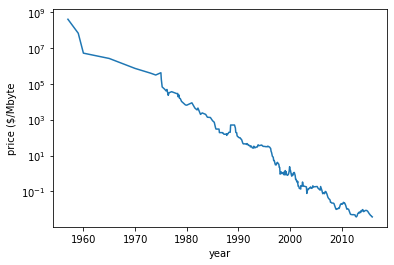

In [7]:
import os

ram_price = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH,
                 "ram_price.csv"))
# y축 로그스케일로 출력
plt.semilogy(ram_price.date, ram_price.price)
plt.xlabel("year")
plt.ylabel("price ($/Mbyte")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


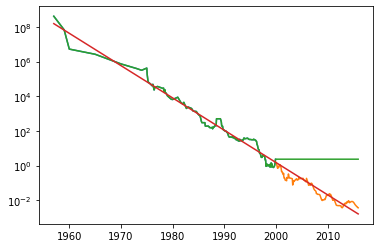

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전 훈련데이터, 2000년 이후 테스트 데이터
data_train = ram_price[ram_price.date < 2000]
data_test = ram_price[ram_price.date >= 2000]

# 날짜 특성만 선택
X_train = data_train.date[:, np.newaxis]

# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 변경
y_train = np.log(data_train.price)

# 학습모델생성 : 회귀결정트리 / 선형모델 둘 다 fit
tree = DecisionTreeRegressor().fit(X_train, y_train)
Linear_reg = LinearRegression().fit(X_train, y_train)

# 예측 : 전체 기간 predict
X_all = ram_price.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = Linear_reg.predict(X_all)

# 예측값을 로그 스케일로
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)
plt.semilogy(data_train.date, data_train.price, label="train data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_price.date, price_tree, label="regression decision tree prediction")
plt.semilogy(ram_price.date, price_lr, label="linear regression prediction")

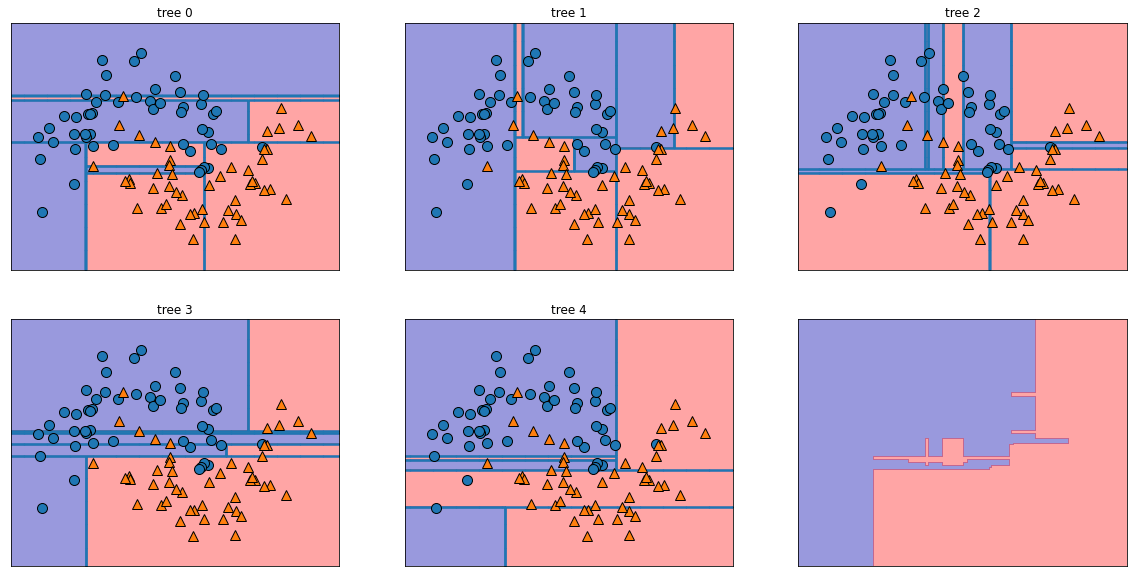

In [13]:
# random forest import
# split, tree num, fit

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)

train set score : 0.995
test set score : 0.944


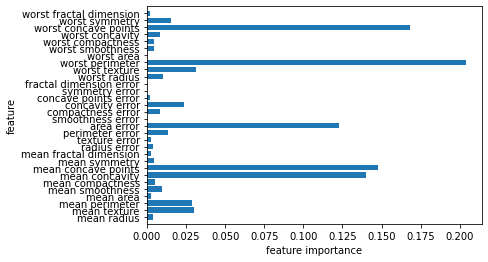

In [15]:
# data split, 100개 트리, fit, score

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(X_train, y_train)
print("train set score : {:.3f}".format(forest.score(X_train, y_train)))
print("test set score : {:.3f}".format(forest.score(X_test, y_test)))
plot_feature_importances_cancer(forest)